In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanalisiddiqui/fraud-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Henry\.cache\kagglehub\datasets\amanalisiddiqui\fraud-detection-dataset\versions\1


In [2]:
import os
import pandas as pd

path_file = os.path.join(path, os.listdir(path)[0])

df = pd.read_csv(path_file)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis

Further approaches could be used to feature engineer properties that could further strengthen the fraud detection algorithms as well as find out where the existing algorithm lacks.

CASH-IN: is the process of increasing the balance of
account by paying in cash to a merchant.

CASH-OUT: is the opposite process of CASH-IN, it
means to withdraw cash from a merchant which decreases
the balance of the account.

DEBIT: is similar process than CASH-OUT and involves sending the money from the mobile money service
to a bank account.

PAYMENT: is the process of paying for goods or services to merchants which decreases the balance of the account and increases the balance of the receiver.

TRANSFER: is the process of sending money to another user of the service through the mobile money platform

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='isFraud', ylabel='count'>

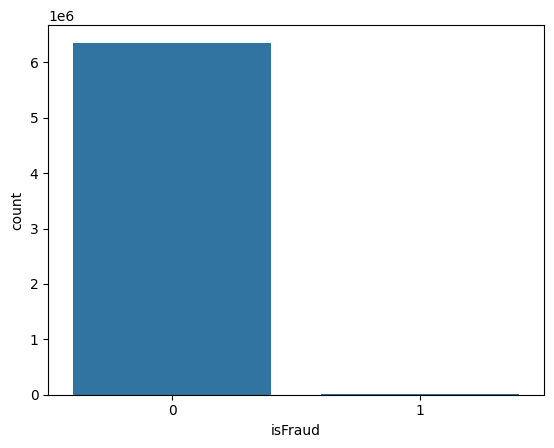

In [5]:
sns.countplot(x='isFraud', data=df)

<Axes: xlabel='type', ylabel='isFraud'>

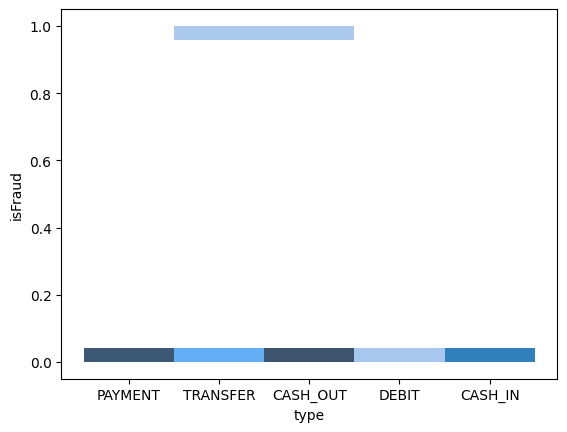

In [6]:
sns.histplot(x='type', y='isFraud', data=df)

<Axes: >

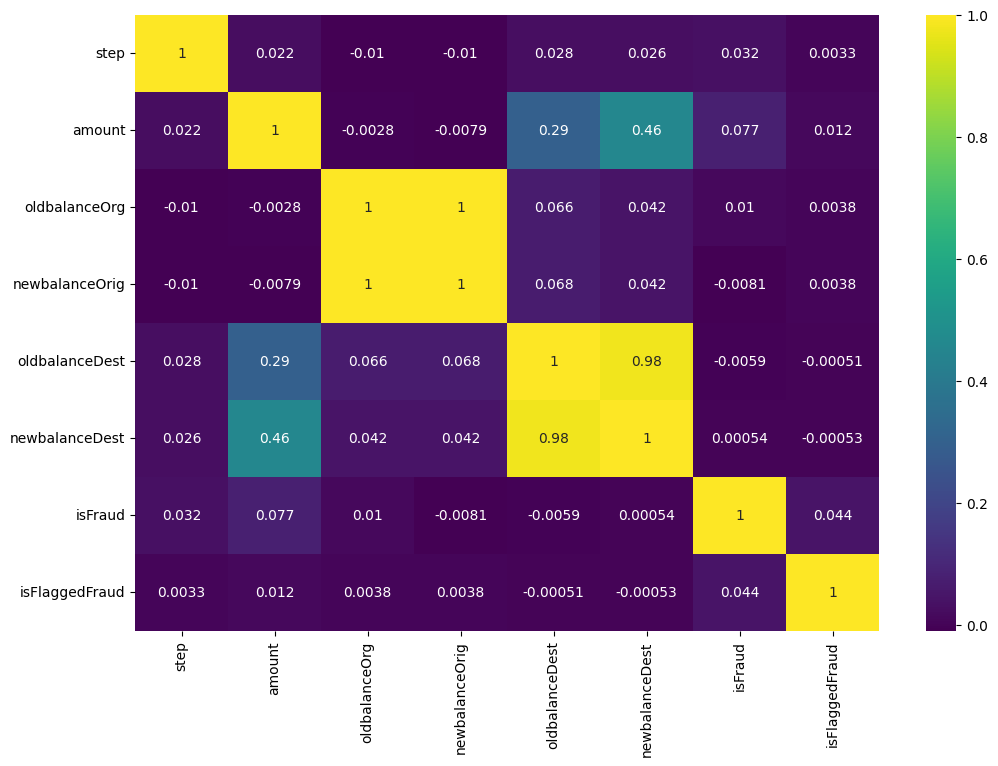

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

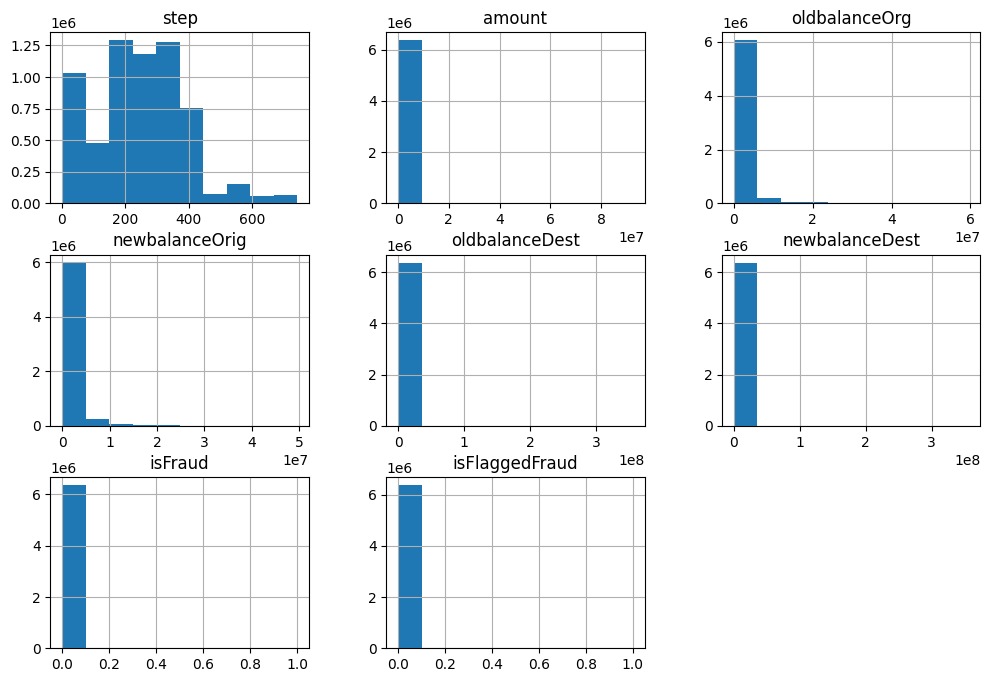

In [8]:
df.hist(figsize=(12,8))
plt.show()

# Preprocessing

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
# Step would mean a part of the time. Think of timestamps cut into partitions.
# Step 1 - step 2 - step 3
# 1 -5 - 10 -15 hours
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
df[df['isFraud'] == 0].count(), df[df['isFraud'] == 1].count()

(step              6354407
 type              6354407
 amount            6354407
 nameOrig          6354407
 oldbalanceOrg     6354407
 newbalanceOrig    6354407
 nameDest          6354407
 oldbalanceDest    6354407
 newbalanceDest    6354407
 isFraud           6354407
 isFlaggedFraud    6354407
 dtype: int64,
 step              8213
 type              8213
 amount            8213
 nameOrig          8213
 oldbalanceOrg     8213
 newbalanceOrig    8213
 nameDest          8213
 oldbalanceDest    8213
 newbalanceDest    8213
 isFraud           8213
 isFlaggedFraud    8213
 dtype: int64)

- Removeremos as colunas `nameOrig` e  `nameDest` por representar apenas uma entidade.

In [12]:
df.drop(['nameOrig', 'nameDest'], inplace=True, axis=1)

- Aplicação do dummy para coluna `type`

In [13]:
df = pd.get_dummies(df, columns=['type'], dtype=float)

In [14]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN      float64
type_CASH_OUT     float64
type_DEBIT        float64
type_PAYMENT      float64
type_TRANSFER     float64
dtype: object

In [15]:
df = df.astype(float)

# Undersampling - RandomUnderSampler

In [16]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('isFraud', axis=1).values
y = df['isFraud'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [19]:
under = RandomUnderSampler(sampling_strategy=0.1, random_state=42)

In [20]:
X_train_under , y_train_under = under.fit_resample(X_train, y_train)

In [21]:
np.unique(y_train, return_counts=True), np.unique(y_train_under, return_counts=True)

((array([0., 1.]), array([5083526,    6570], dtype=int64)),
 (array([0., 1.]), array([65700,  6570], dtype=int64)))

# Oversampling - Smote

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)

In [24]:
X_train_over, y_train_over = smote.fit_resample(X_train_under, y_train_under)

In [25]:
np.unique(y_train_under, return_counts=True), np.unique(y_train_over, return_counts=True)

((array([0., 1.]), array([65700,  6570], dtype=int64)),
 (array([0., 1.]), array([65700, 65700], dtype=int64)))

# Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [28]:
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=5)

In [29]:
pred = rfc.predict(X_test)

# Evaluation

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98   1270881
         1.0       0.04      0.97      0.07      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.97      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524



In [32]:
cm = confusion_matrix(y_test, pred)

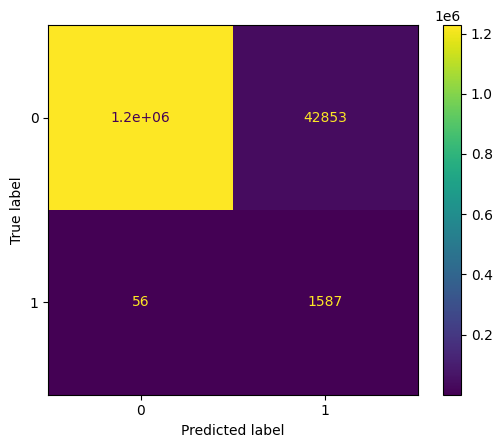

In [33]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()

# Ajuste de threshold

- Ajustar o `threshold` é importante onde queremos encontrar o melhor trade-off entre a precisão e recall

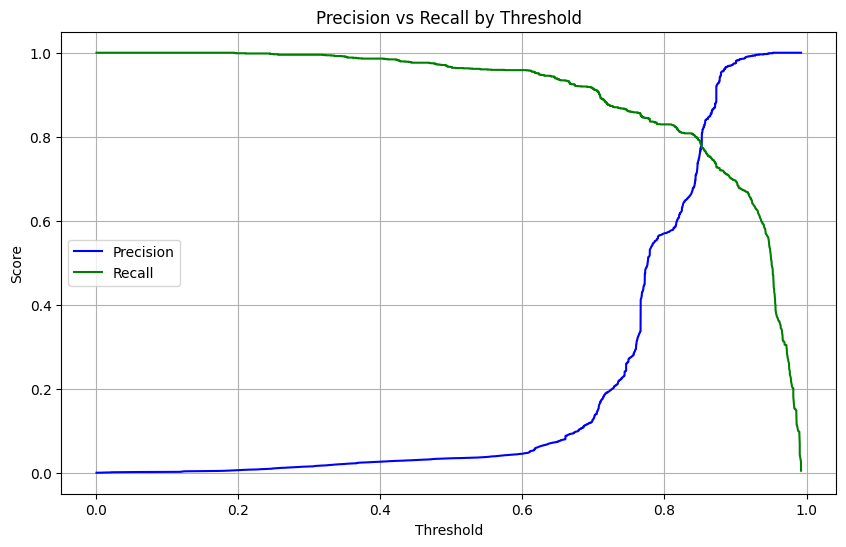

In [34]:
from sklearn.metrics import precision_recall_curve

y_scores = rfc.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall by Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
chosen_threshold = 0.7
y_pred_threshold = (y_scores > chosen_threshold).astype(int)

In [36]:
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   1270881
         1.0       0.13      0.91      0.23      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.95      0.61   1272524
weighted avg       1.00      0.99      0.99   1272524



# Pipeline

In [37]:
from imblearn.pipeline import Pipeline

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [39]:
pipeline = Pipeline([
    ('undersample', RandomUnderSampler(sampling_strategy=0.1, random_state=42)),
    ('oversample', SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)),
    ('model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('undersample',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.1)),
                ('oversample',
                 SMOTE(k_neighbors=3, random_state=42,
                       sampling_strategy='minority')),
                ('model',
                 RandomForestClassifier(max_depth=5, random_state=42))])

In [41]:
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [42]:
threshold = 0.7
y_pred_thresh = (y_proba >= threshold).astype(int)

In [43]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   1270881
         1.0       0.11      0.89      0.20      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.94      0.60   1272524
weighted avg       1.00      0.99      0.99   1272524



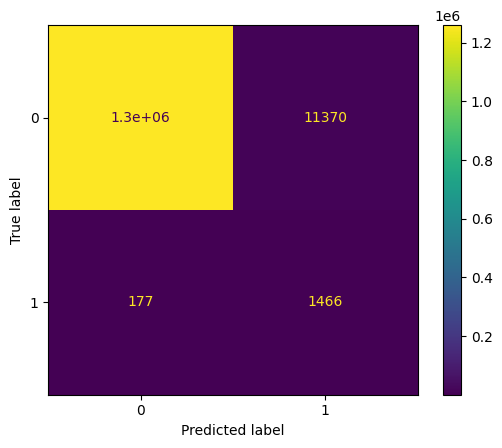

In [44]:
cm = confusion_matrix(y_test, y_pred_thresh)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_disp.plot()

Com ajuste realizados, conseguimos manter uma boa recall, minimizando o máximo dos falsos negativos, já que:
- Melhor prever todas transações que realmente são fraudes do que não prever elas.
- O modelo irá também prever transações como fraudulentas aquelas que não são fraude.

E para nosso contexto essa é melhor forma de lidar com casos de fraudes

---

In [45]:
import joblib